In [2]:
# File system manangement
import time, psutil, os
import numpy as np
import pandas as pd
import h5py

dataset = pd.DataFrame()

with h5py.File('/Users/samar/Downloads/hgcal_electron_data_0001.h5', "r") as f:
    print("Keys: %s" % f.keys())
    a_group_1 = list(f.keys())[0]
    a_group_2 = list(f.keys())[1]
    a_group_3 = list(f.keys())[2]
    a_group_4 = list(f.keys())[3]
    a_group_5 = list(f.keys())[4]
    a_group_6 = list(f.keys())[5]
    ds_arr_1 = f[a_group_1][:100000]
    ds_arr_2 = f[a_group_2][:100000]
    ds_arr_3 = f[a_group_3][:100000]
    ds_arr_4 = f[a_group_4][:100000]
    ds_arr_5 = f[a_group_5][:100000]
    ds_arr_6 = f[a_group_6][:100000]
    df = pd.DataFrame({a_group_1: ds_arr_1, a_group_2: ds_arr_2, a_group_3: ds_arr_3, a_group_4: ds_arr_4, a_group_5: ds_arr_5, a_group_6: ds_arr_6 })
    

Keys: <KeysViewHDF5 ['nhits', 'rechit_energy', 'rechit_x', 'rechit_y', 'rechit_z', 'target']>


In [2]:
train_dataset = h5py.File('/Users/samar/Downloads/hgcal_electron_data_0001.h5', "r")
keys=['nhits', 'rechit_energy', 'rechit_x', 'rechit_y', 'rechit_z', 'target']
for i in range(len(keys)):
    train_set_var = np.array(train_dataset[keys[i]][:])
    print("Shape of {0} = {1}".format(keys[i], train_set_var.shape))
    print("{0} = {1}".format(keys[i], train_set_var))

Shape of nhits = (648277,)
nhits = [1115. 1048.  684. ... 1227.  878.  929.]
Shape of rechit_energy = (518275904,)
rechit_energy = [29.80688095  1.3796525   5.81250668 ...  1.26932192  1.32160068
  3.06015182]
Shape of rechit_x = (518275904,)
rechit_x = [-1.94352722  0.         -1.94352722 ... -3.88705444 -4.85881805
  0.97176361]
Shape of rechit_y = (518275904,)
rechit_y = [ 1.12209594  1.12209594  2.24419188 ... -3.36628795 -0.56104797
  0.56104797]
Shape of rechit_z = (518275904,)
rechit_z = [13.87749958 14.76749992 14.76749992 ... 53.9034996  53.9034996
 53.9034996 ]
Shape of target = (648277,)
target = [286.60653027 260.23076694 122.32089501 ... 332.82049715 185.57844533
 179.74502153]


In [5]:
train_dataset = h5py.File('/Users/samar/Downloads/hgcal_electron_data_0001.h5', "r")
nhits = np.array(train_dataset['nhits'][:])
print("Shape of nhits = ", nhits.shape)
print("Total numbers of nhits = ", np.sum(nhits))

Shape of nhits =  (648277,)
Total numbers of nhits =  518275904.0


In [3]:
train_dataset = h5py.File('/Users/samar/Downloads/hgcal_electron_data_0001.h5', "r")
nhits = np.array(train_dataset['nhits'][:])
rechit_energy = np.array(train_dataset['rechit_energy'][:])
rechit_z = np.array(train_dataset['rechit_z'][:])

target_energy = np.array(train_dataset['target'][:])

# Verify that the sum of nhits matches the length of rechit_energy
assert np.sum(nhits) == rechit_energy.size, "The total number of hits must equal the length of the rechit_energy array"

# Initialize an empty list to hold the subarrays
reshaped_energy = []
reshaped_z = []

# Current index in the rechit_energy array
current_index = 0

# Iterate over the nhits array
for nhit in nhits:
    # Convert nhit to an integer
    nhit = int(nhit)
    # Extract the corresponding subarray from rechit_energy
    subarray_energy = rechit_energy[current_index:current_index + nhit]
    subarray_z = rechit_z[current_index:current_index + nhit]
    # Append the subarray to the list
    reshaped_energy.append(subarray_energy)
    reshaped_z.append(subarray_z)
    # Update the current index
    current_index += nhit

# Convert the list of subarrays into a 2D NumPy array
reshaped_energy_array = np.array(reshaped_energy, dtype=object)
reshaped_z_array = np.array(reshaped_z, dtype=object)
rechit_sum_array = [sum(x) for x in reshaped_energy_array]
#print(reshaped_energy_array.shape[0])
#print(reshaped_energy_array)

#print(reshaped_z_array.shape[0])
#print(reshaped_z_array)

print(sum(reshaped_energy_array[0]))
print(rechit_sum_array[0])

28207.70488500595
28207.70488500595


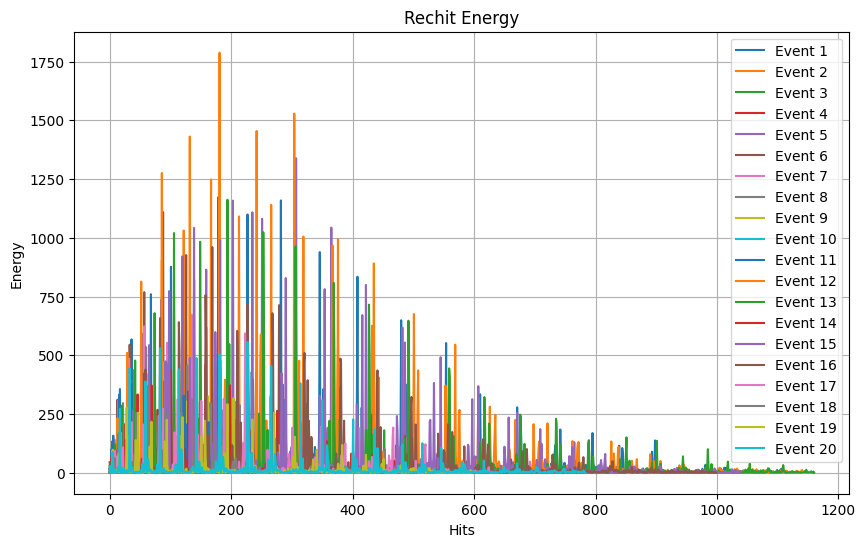

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(20):
    plt.plot(reshaped_energy_array[i], label=f'Event {i+1}')

plt.title('Rechit Energy')
plt.xlabel('Hits')
plt.ylabel('Energy')
plt.grid(True)
plt.legend()
plt.show()

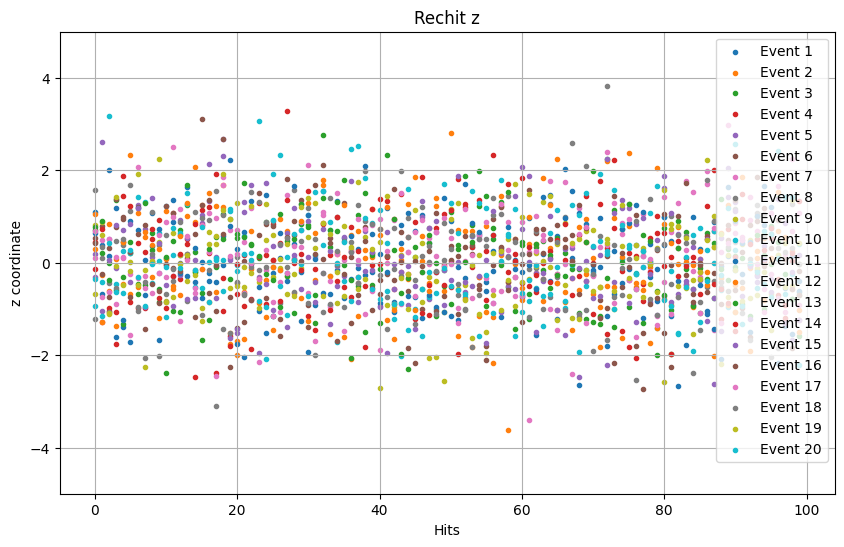

In [5]:
import matplotlib.pyplot as plt

# Sample data (assuming reshaped_x_array is already defined)
reshaped_z_array = np.random.randn(20, 100)  # Example data, replace with your actual reshaped_z_array

plt.figure(figsize=(10, 6))
for i in range(20):
    plt.scatter(np.arange(len(reshaped_z_array[i])), reshaped_z_array[i], label=f'Event {i+1}', marker='.')

plt.title('Rechit z')
plt.xlabel('Hits')
plt.ylabel('z coordinate')
plt.grid(True)
plt.legend()
plt.ylim(-5, 5)
plt.show()

In [42]:
df.shape

(100000, 6)

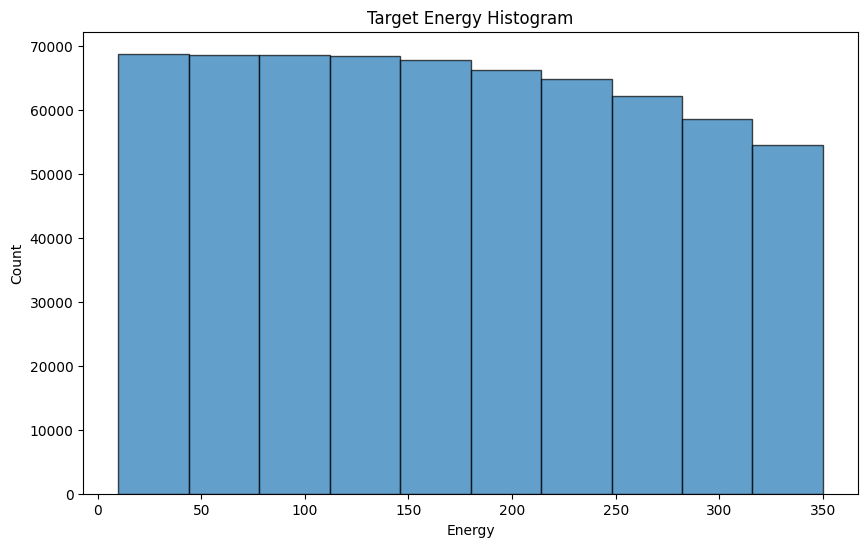

In [24]:
# Plot the histogram of target_energy with 28 bins
n_bins = 10
hist, bins = np.histogram(target_energy, bins=n_bins)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(target_energy, bins=n_bins, edgecolor='black', alpha=0.7)
plt.title('Target Energy Histogram')
plt.xlabel('Energy')
plt.ylabel('Count')
plt.show()

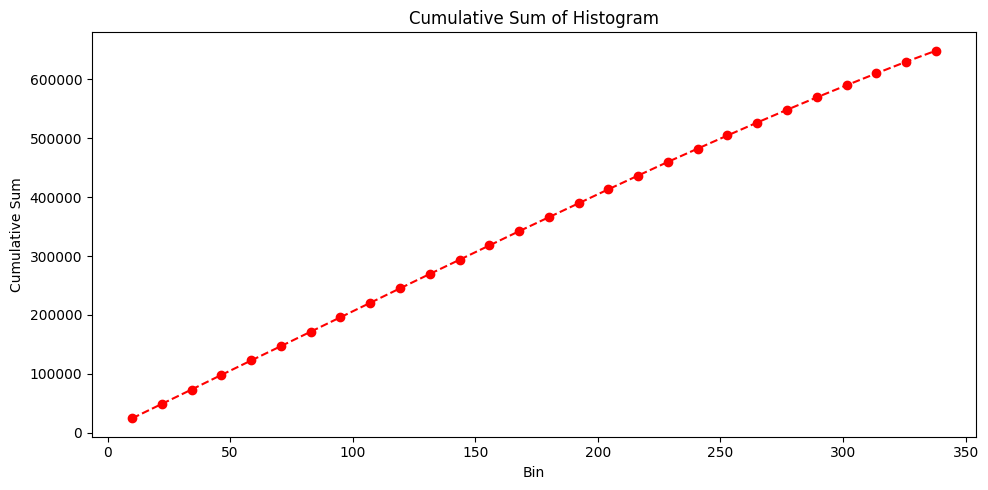

In [23]:
bin_sums = hist.cumsum()
plt.figure(figsize=(10, 5))
plt.plot(bins[:-1], bin_sums, marker='o', linestyle='--', color='r')
plt.title('Cumulative Sum of Histogram')
plt.xlabel('Bin')
plt.ylabel('Cumulative Sum')

plt.tight_layout()
plt.show()

In [86]:
df.head(100)

,nhits,rechit_energy,rechit_x,rechit_y,rechit_z,target
0,1115.0,29.806881,-1.943527,1.122096,13.877500,286.606530
1,1048.0,1.379653,0.000000,1.122096,14.767500,260.230767
2,684.0,5.812507,-1.943527,2.244192,14.767500,122.320895
3,491.0,99.901855,-1.943527,1.122096,14.767500,64.871587
4,1029.0,0.766559,-2.915291,-1.683144,14.767500,237.140564
...,...,...,...,...,...,...
95,205.0,1.264114,-0.971764,3.927336,20.577499,18.808531
96,724.0,8.374294,-0.971764,2.805240,20.577499,138.491583
97,1029.0,33.460140,-0.971764,1.683144,20.577499,236.499134
98,289.0,27.821980,-0.971764,0.561048,20.577499,28.950084


In [44]:
df.columns

Index(['nhits', 'rechit_energy', 'rechit_x', 'rechit_y', 'rechit_z', 'target'], dtype='object')

In [73]:
features_corr=['nhits', 'rechit_energy', 'rechit_x', 'rechit_y', 'rechit_z']

<Axes: >

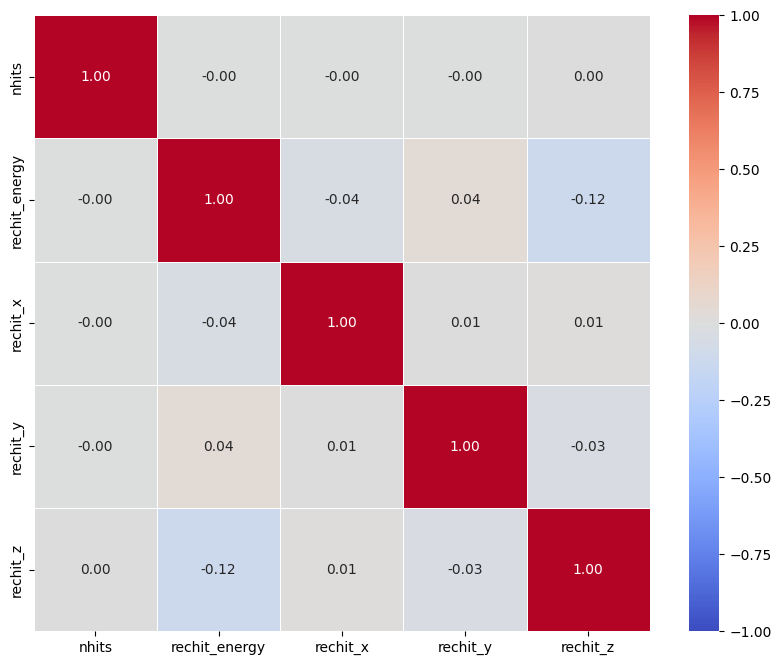

In [74]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

df_corr=df[features_corr]
corr=df_corr.corr()
f, ax=plt.subplots(figsize=(10,8))
plt.rcParams.update({'font.size': 10})
sn.heatmap(corr, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
#plt.savefig("corr_matrix_hgcal_project.png")

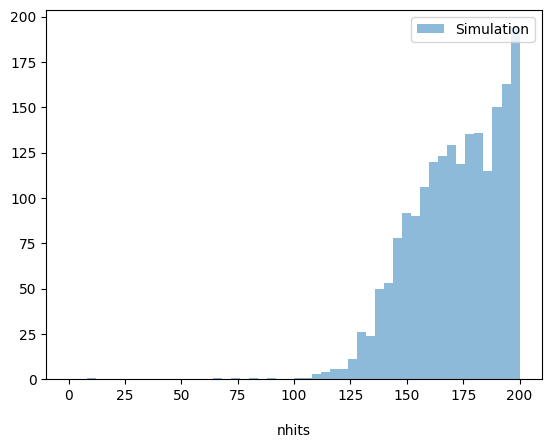

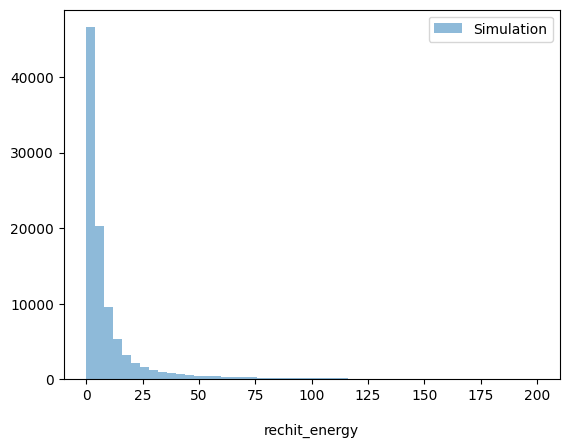

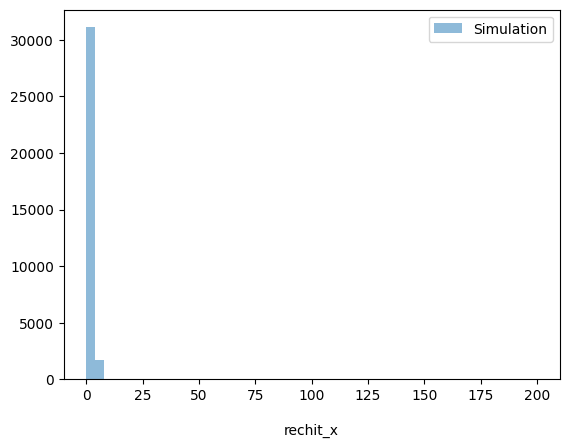

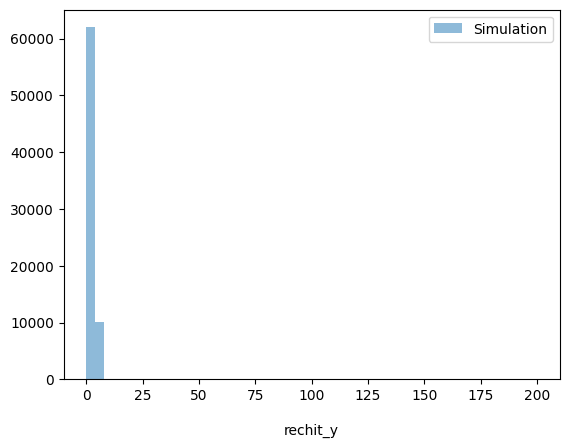

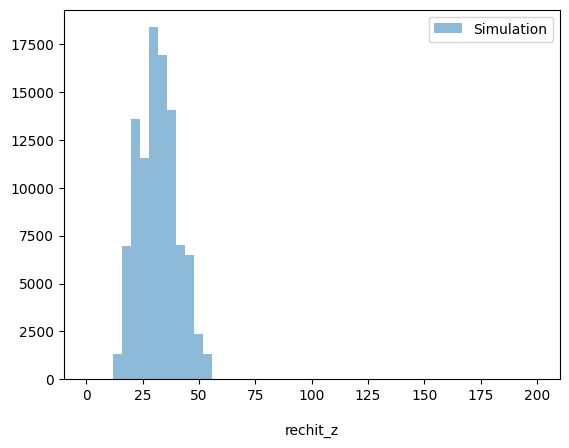

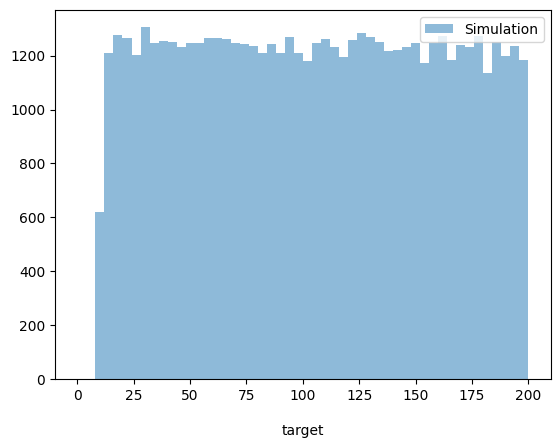

In [63]:
features=['nhits', 'rechit_energy', 'rechit_x', 'rechit_y', 'rechit_z', 'target']

for i in range(len(features)):
    var = df[features[i]].to_numpy()
    plt.hist([var], bins=50, range=[0,200], alpha=0.5, label=['Simulation'])
    plt.xlabel(features[i], labelpad=15)
    plt.legend(loc='upper right')
    plt.show()  # Display the plot for each feature

In [75]:
features_train=['nhits', 'rechit_energy', 'rechit_x', 'rechit_y', 'rechit_z']

df_train = df[features_train]
print(df_train.head().T)

X = np.array(df_train)
y = np.array(df['target'])
print("Shape of X = {0}, Shape of y = {1}".format(X.shape, y.shape))

                         0            1           2           3            4
nhits          1115.000000  1048.000000  684.000000  491.000000  1029.000000
rechit_energy    29.806881     1.379653    5.812507   99.901855     0.766559
rechit_x         -1.943527     0.000000   -1.943527   -1.943527    -2.915291
rechit_y          1.122096     1.122096    2.244192    1.122096    -1.683144
rechit_z         13.877500    14.767500   14.767500   14.767500    14.767500
Shape of X = (100000, 5), Shape of y = (100000,)


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Shape of X_train = {0}, Shape of y_train = {1}".format(X_train.shape, y_train.shape))
print("Shape of X_test = {0}, Shape of y_test = {1}".format(X_test.shape, y_test.shape))

Shape of X_train = (80000, 5), Shape of y_train = (80000,)
Shape of X_test = (20000, 5), Shape of y_test = (20000,)


In [77]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
#param_dict={'objective':'multi:softprob', 'n_estimators':200, 'learning_rate':0.1, 'max_depth':6, 'gamma':0, 'n_jobs':10, 'num_class':2}
#clf=xgb.XGBClassifier(use_label_encoder=False, **param_dict)
#clf.fit(X_train, y_train)

In [78]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 231.9274


In [79]:
# Get the score on the training set
train_score = reg.score(X_train, y_train)
print(f"Training score: {train_score:.4f}")

# Get the score on the test set
test_score = reg.score(X_test, y_test)
print(f"Test score: {test_score:.4f}")

Training score: 0.9754
Test score: 0.9751


In [80]:
# Make predictions
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

# Print the predicted values for the training set
print("Predicted values for the training set:")
print(y_pred_train)

# Print the predicted values for the test set
print("Predicted values for the test set:")
print(y_pred_test)

Predicted values for the training set:
[134.49776363  59.7549429   63.20102843 ... 328.69152529  88.4536261
 298.3545116 ]
Predicted values for the test set:
[208.84239106 266.95360227 106.11386973 ... 112.80235737  57.93358065
 102.8544985 ]


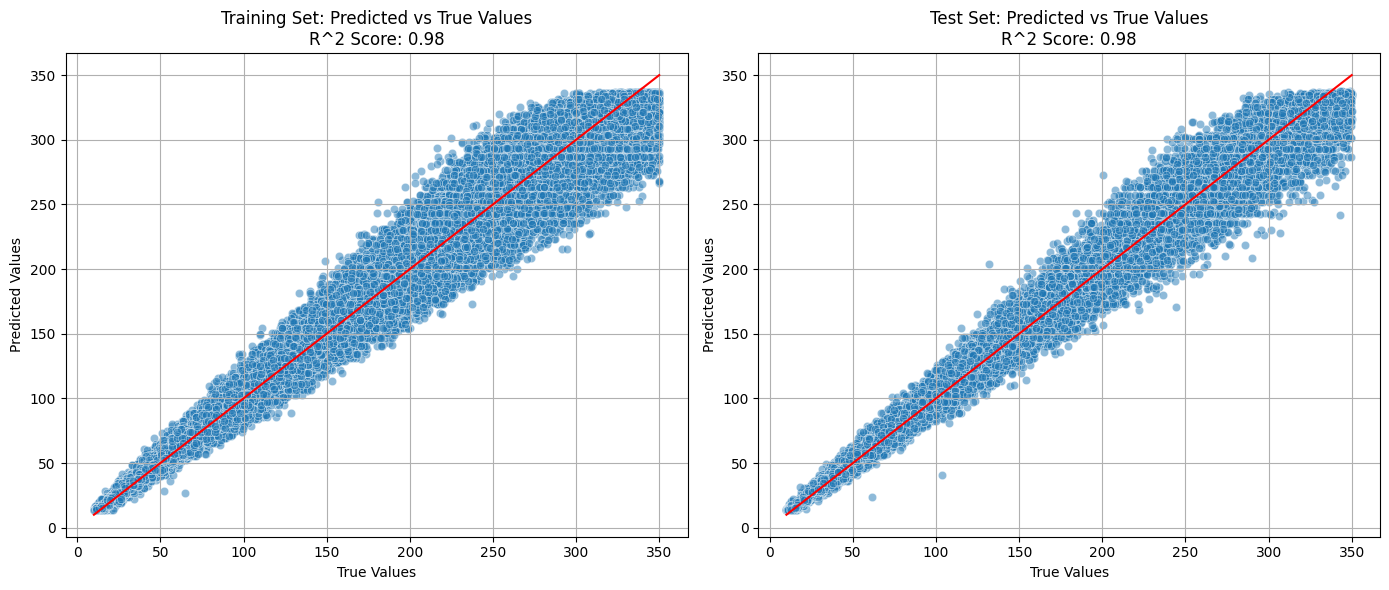

In [81]:
# Plot predicted vs. true values for the test set
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

# Calculate R^2 scores
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Plot predicted vs. true values for the training set
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.5)
sns.lineplot(x=y_train, y=y_train, color='red')  # Plotting y = x line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Training Set: Predicted vs True Values\nR^2 Score: {train_r2:.2f}')
plt.grid(True)

# Plot predicted vs. true values for the test set
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5)
sns.lineplot(x=y_test, y=y_test, color='red')  # Plotting y = x line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Test Set: Predicted vs True Values\nR^2 Score: {test_r2:.2f}')
plt.grid(True)

plt.tight_layout()
plt.show()

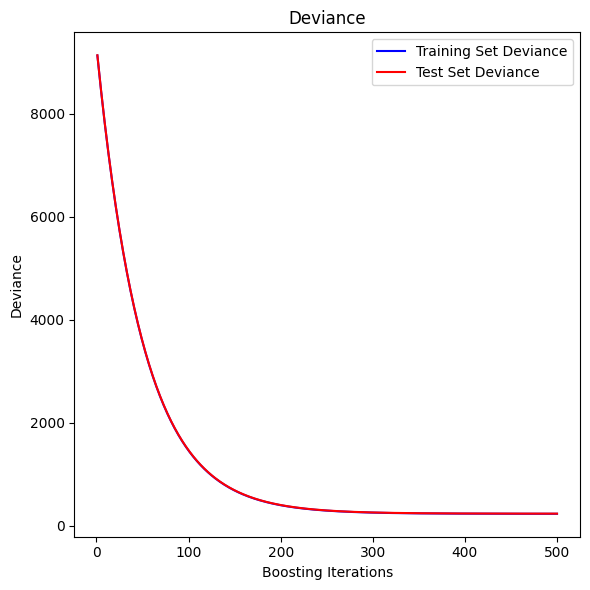

In [82]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)

for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

/var/folders/c4/w566ky756lg1l9xvlyt0yh2h0000gn/T/ipykernel_97713/2535928094.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


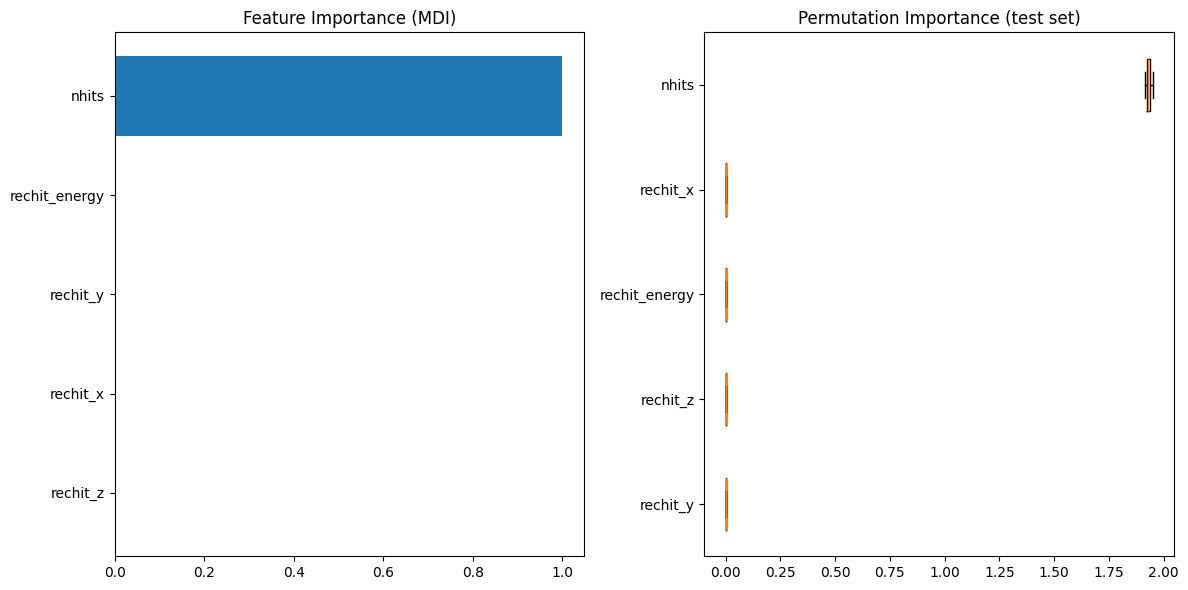

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Assuming reg is your trained model, and df_train is your training DataFrame
# Ensure df_train is your training DataFrame, and it has columns as feature names

# Feature importances from the trained model
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

fig = plt.figure(figsize=(12, 6))

# Plot the feature importances
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

# Calculate permutation importances
result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()

# Plot the permutation importances
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_train.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")

fig.tight_layout()
plt.show()
